In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [13]:
# Load Dataset
file_path = "Plant_data.csv"  
df = pd.read_csv("Plant_data.csv" )


In [12]:
# Basic Data Understanding
print(" First 5 Rows ")
print(df.head())


 First 5 Rows 
   Coal_Input_tons  Steam_Pressure_bar  Steam_Temperature_C  \
0         12891.34              255.15               568.75   
1         12764.35              256.45               566.97   
2         12921.54              253.95               566.71   
3         13096.61              254.51               568.58   
4         12745.17              254.41               567.73   

   Boiler_Efficiency_percent  SO2_Before_FGD_ppm  SO2_After_FGD_ppm  \
0                      85.25              940.39              44.81   
1                      84.81              960.65              47.87   
2                      85.20              927.82              42.04   
3                      85.03              938.03              46.51   
4                      84.88              943.80              43.41   

   Fly_Ash_Before_ESP_mgNm3  Fly_Ash_After_ESP_mgNm3  Ambient_Temperature_C  \
0                    308.36                     2.66                  38.77   
1                    

In [15]:
print(" Dataset Shape ")
print(df.shape)

 Dataset Shape 
(90, 12)


In [16]:
print(" Column Names ")
print(df.columns.tolist())

 Column Names 
['Coal_Input_tons', 'Steam_Pressure_bar', 'Steam_Temperature_C', 'Boiler_Efficiency_percent', 'SO2_Before_FGD_ppm', 'SO2_After_FGD_ppm', 'Fly_Ash_Before_ESP_mgNm3', 'Fly_Ash_After_ESP_mgNm3', 'Ambient_Temperature_C', 'Unit_Load_MW', 'Unburnt_Carbon_percent', 'Boiler_Trip_Event']


In [17]:
print(" Data Types ")
print(df.dtypes)

 Data Types 
Coal_Input_tons              float64
Steam_Pressure_bar           float64
Steam_Temperature_C          float64
Boiler_Efficiency_percent    float64
SO2_Before_FGD_ppm           float64
SO2_After_FGD_ppm            float64
Fly_Ash_Before_ESP_mgNm3     float64
Fly_Ash_After_ESP_mgNm3      float64
Ambient_Temperature_C        float64
Unit_Load_MW                 float64
Unburnt_Carbon_percent       float64
Boiler_Trip_Event              int64
dtype: object


In [18]:
print(" Null Values Check ")
print(df.isnull().sum())

 Null Values Check 
Coal_Input_tons              0
Steam_Pressure_bar           0
Steam_Temperature_C          0
Boiler_Efficiency_percent    0
SO2_Before_FGD_ppm           0
SO2_After_FGD_ppm            0
Fly_Ash_Before_ESP_mgNm3     0
Fly_Ash_After_ESP_mgNm3      0
Ambient_Temperature_C        0
Unit_Load_MW                 0
Unburnt_Carbon_percent       0
Boiler_Trip_Event            0
dtype: int64


In [30]:
# Descriptive Statistics


# maximum width setting so that output doesn't wrap
pd.set_option('display.width', 1000)

#increase max columns shown
pd.set_option('display.max_columns', 20)

# Now print your summary
print(df.describe().T)




                           count          mean         std       min         25%        50%         75%       max
Coal_Input_tons             90.0  12772.238667  186.989861  12268.05  12671.7125  12766.610  12893.8225  13162.46
Steam_Pressure_bar          90.0    255.082000    1.446167    252.12    253.9350    255.125    255.8550    259.08
Steam_Temperature_C         90.0    567.988111    1.291587    564.11    567.0825    568.075    568.7750    572.62
Boiler_Efficiency_percent   90.0     85.039333    0.121320     84.74     84.9500     85.035     85.1200     85.35
SO2_Before_FGD_ppm          90.0    931.330444   21.209794    887.52    914.8725    931.415    944.3200    973.80
SO2_After_FGD_ppm           90.0     44.511778    2.933036     38.09     42.4200     44.310     46.5925     54.24
Fly_Ash_Before_ESP_mgNm3    90.0    301.098778    9.963216    275.28    295.2675    302.030    307.4925    324.46
Fly_Ash_After_ESP_mgNm3     90.0      2.979667    0.208760      2.46      2.8675      2.

In [33]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f" Duplicate Rows: {duplicates} ")

 Duplicate Rows: 0 


 # Exploratory Data Analysis (EDA)


### (1) Univariate Analysis: Distribution plots

Text(0.5, 1.0, 'Boiler Efficiency Distribution')

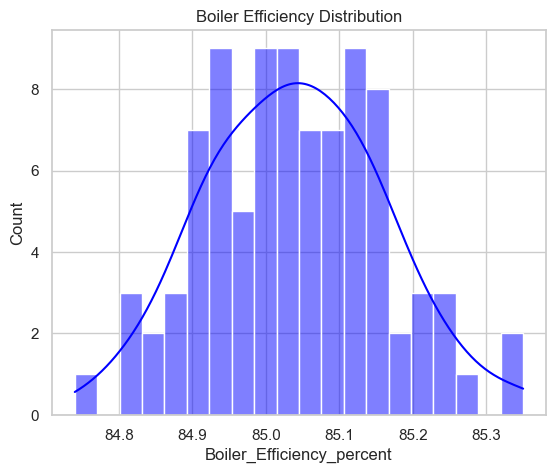

In [35]:

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Boiler_Efficiency_percent'], kde=True, bins=20, color='blue')
plt.title('Boiler Efficiency Distribution')

 ### Insights: 
 #### Boiler efficiency is stable and consistent with minor fluctuations — a good sign for operational reliability.
 #### From x-axis: Efficiency lies between ~84.8% to 85.3% → total variation is just ~0.5%.This narrow range indicates very high process control. Boiler efficiency is tightly regulated — shows high process optimization or effective automation.

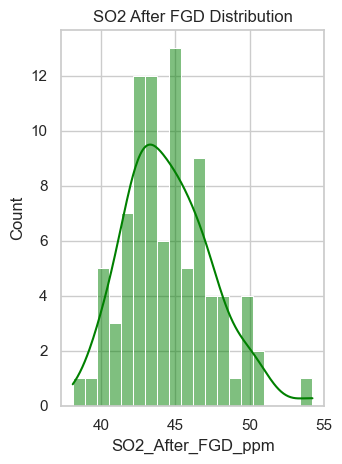

In [38]:
plt.subplot(1, 2, 2)
sns.histplot(df['SO2_After_FGD_ppm'], kde=True, bins=20, color='green')
plt.title('SO2 After FGD Distribution')
plt.tight_layout()
plt.show()


### Insights
#### FGD is reducing SO₂ significantly, but performance is not fully uniform — there’s variability, possibly due to load changes, equipment wear, or fuel sulfur content variation.
#### A few post-FGD SO₂ emissions are close to environmental limit levels. These could be potential violations or at least indicators of system inefficiency.
#### Although the SO₂ levels are within limits, the values range from approximately 38 to 54 ppm, which shows variability in FGD performance. This reflects that the system is working but not with uniform efficiency.



 ### (2) Time Series Plots


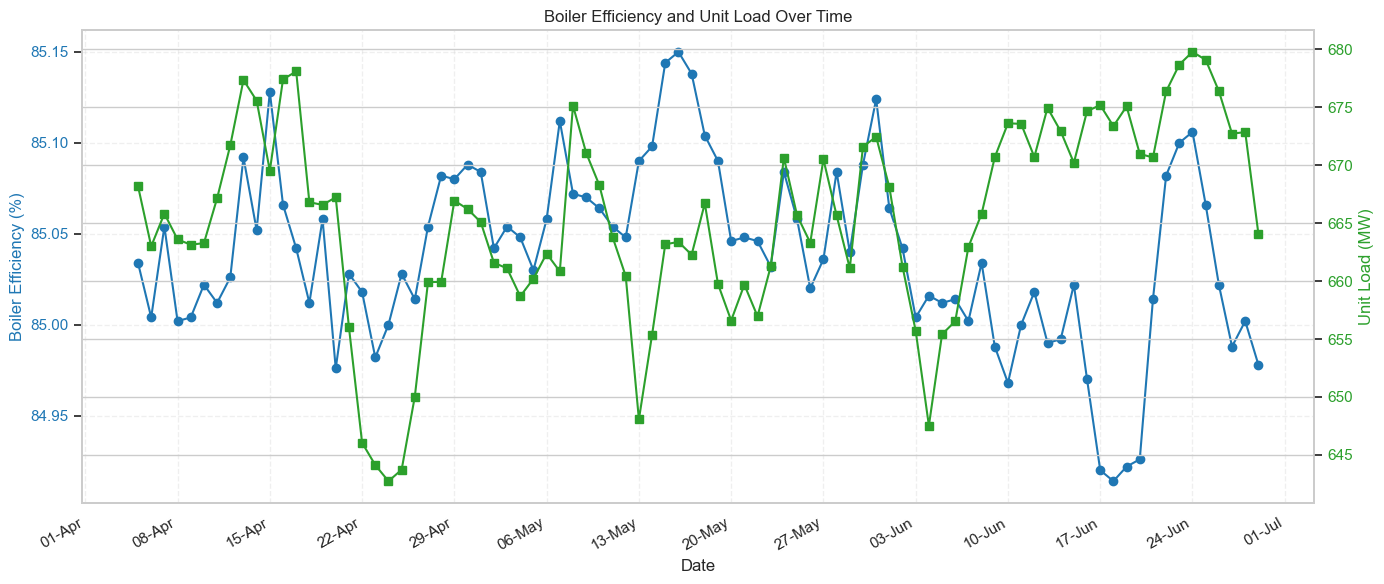

In [64]:

# Converting Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Creating figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting Boiler Efficiency on primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Boiler Efficiency (%)', color=color1)
ax1.plot(df['Date'], df['Boiler_Efficiency_smooth'], color=color1, label='Boiler Efficiency', marker='o')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle='--', alpha=0.3)

# Formatting x-axis as date
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# Plot Unit Load on secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Unit Load (MW)', color=color2)
ax2.plot(df['Date'], df['Unit_Load_smooth'], color=color2, label='Unit Load', marker='s')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Boiler Efficiency and Unit Load Over Time')
fig.autofmt_xdate()
fig.tight_layout()

plt.show()



### Insights: 
#### (1) Boiler efficiency remains within a tight range (84.95%–85.15%),This indicates that the boiler is well-tuned and stable.Minor dips might reflect routine operational changes or maintenance.
#### (2) Load fluctuates between ~640 MW and 680 MW, driven by demand changes(generally, i've observed that at the evening time demand is maximum and in morning minimum) or operational conditions, but these variations don’t consistently impact boiler efficiency.

## Bivariate Analysis

### Correlation Heatmap


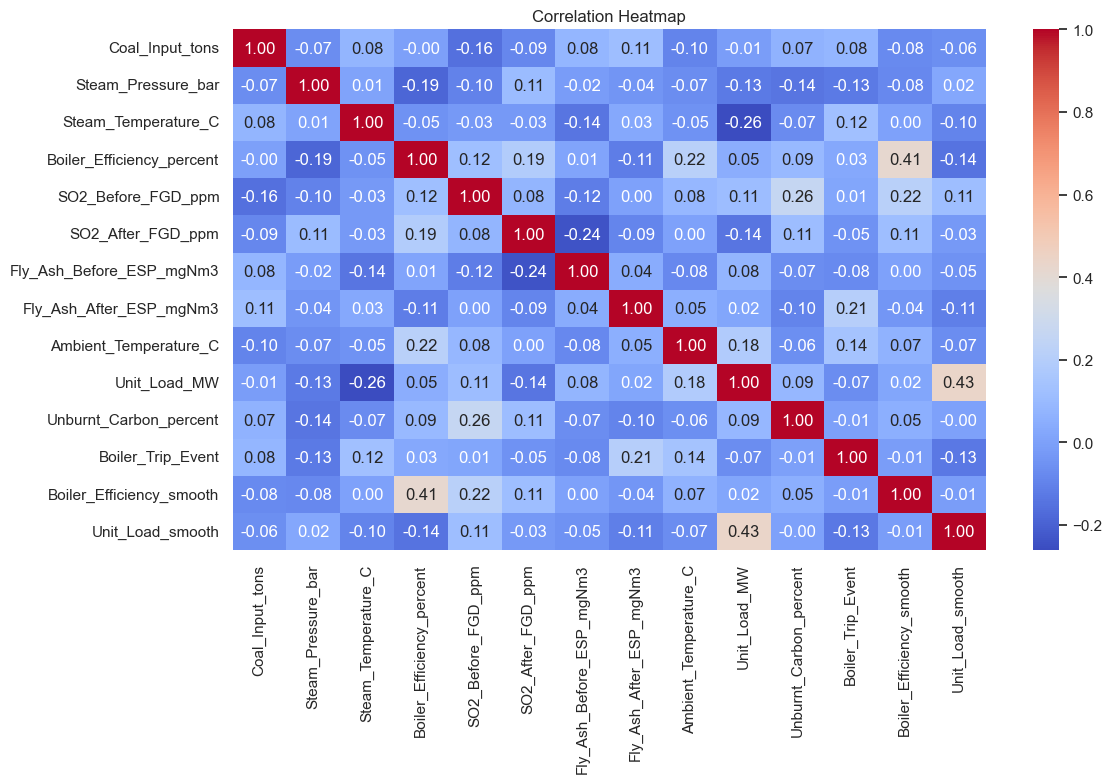

In [65]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##  Insights

#### (1) There is a positive correlation (+0.22) between Boiler_Efficiency_percent and Unit_Load_MW, as seen in the heatmap.This suggests that as the unit load increases, boiler efficiency tends to improve slightly.
#### (2) The heatmap shows a positive correlation (+0.22) between Boiler_Efficiency_percent and Ambient_Temperature_C. It indicates that higher ambient temperature may support slightly better boiler performance, possibly due to reduced heat losses.
#### (3) The correlation between SO2_Before_FGD_ppm and SO2_After_FGD_ppm is very low (only +0.08) in the heatmap.This means the FGD unit is effectively removing SO₂ regardless of the input concentration, which indicates robust performance.
#### (4) Coal_Input_tons shows near-zero correlation with both Boiler_Efficiency_percent (–0.00) and emissions in the heatmap.This implies that the amount of coal input alone does not impact performance or emissions — the focus should be on coal quality, not quantity.

## When and How Often Boiler Trips Occurred

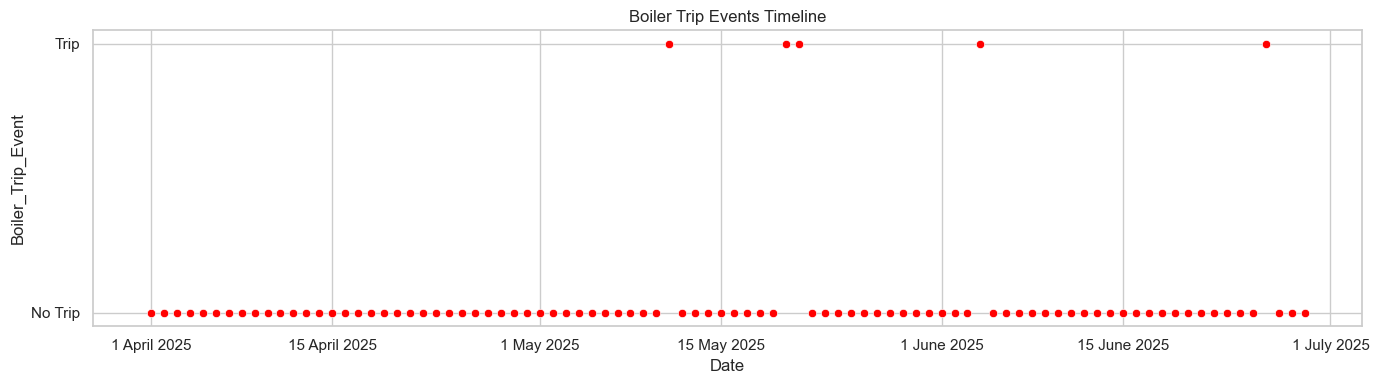

In [71]:

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 4))
sns.scatterplot(data=df, x='Date', y='Boiler_Trip_Event', color='red')
plt.title('Boiler Trip Events Timeline')
plt.yticks([0, 1], ['No Trip', 'Trip'])
plt.xlabel('Date')

# Format x-axis dates as "1 June 2025"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%#d %B %Y'))  # Use '%-d' on Linux/Mac

plt.tight_layout()
plt.show()


## Insights
#### (1) The timeline plot shows a noticeable cluster of trip events between 13–21 May 2025, while the rest of the period remains mostly stable. it means that a potential issue during that specific week — such as equipment malfunction, abnormal load, or external environmental factors — which should be diagnosed and addressed.
#### (2) The month of June shows only two isolated trip events, with the rest of the days operating without failure. This suggests that either corrective actions after the May events were effective, or June had more favorable operating conditions — both of which should be analyzed and documented for long-term stability.



# KEY INSIGHTS 

#### (1) Avg. Boiler Efficiency: 85.01% — indicates consistent boiler performance  
#### (2) Avg. FGD (SO₂) Efficiency: 95.15% — effective SO₂ removal  
#### (3) Avg. ESP Efficiency: 98.99% — fly ash control within ideal range  
#### (4) Total Trip Events: 5 in 90 days  
#### (5) Days Efficiency < 85%: 44 days — can be studied further  
#### (6) Avg. Coal per MW: ~19.47 tons/MW  
#### (7) Max SO₂ After FGD: 52 ppm (safe range)  
#### (8) Max Fly Ash After ESP: 3.48 mg/Nm³